In [5]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict
import pyodbc 
import pandas as pd
import numpy as np
import umap
from sklearn import cluster

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DLRBIMSQL;'
                      'Database=ClarityIndex;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

In [3]:
query = """ 
select top 3000 a.RoomName,count(*) As [Total] from 
(SELECT  PQRC.[RoomId],PQRC.RoomName
  FROM [ClarityIndex].[dbo].[PQ_RoomContents] PQRC
  group by PQRC.[RoomId],PQRC.RoomName) a
  group by a.RoomName
  order by count(*) DESC  """

In [4]:
RC = pd.read_sql_query(query,conn)

In [8]:
RC['RoomName'].str.lower().value_counts()

office          1
staff entry     1
d4-r            1
first grade     1
gym stor.       1
               ..
print room      1
search          1
coat closet     1
unit a-1-02b    1
king ada (l)    1
Name: RoomName, Length: 3000, dtype: int64

In [12]:
RC['RoomName'].str.lower().str.split(' ').str[0].value_counts()

unit     76
king     54
stair    42
(e)      32
staff    28
         ..
q2d       1
dean      1
spec.     1
k4-r      1
lg        1
Name: RoomName, Length: 1449, dtype: int64

In [15]:
RC['RoomName'].head(59)

0               OFFICE
1                 Room
2            CLASSROOM
3             CORRIDOR
4              STORAGE
5               TOILET
6            VESTIBULE
7               HUDDLE
8             BED ROOM
9           CONFERENCE
10               STAIR
11            RESTROOM
12                  RR
13                CELL
14      PRIVATE OFFICE
15               PHONE
16                ELEC
17         OPEN OFFICE
18                  WC
19         CIRCULATION
20            BATHROOM
21              SHOWER
22                 TLT
23               LOBBY
24             JANITOR
25                MECH
26                STOR
27             KITCHEN
28                    
29               WOMEN
30           RECEPTION
31                 IDF
32               FOCUS
33                 MEN
34          ELECTRICAL
35    ATTORNEY/ CLIENT
36               STOR.
37          MECHANICAL
38               CORR.
39              LIVING
40             HALLWAY
41                 JAN
42                VEST
43         

In [26]:
RC=RC[RC['RoomName'].str.len()>4].reset_index(drop=True)

In [27]:
RC.head(59)

,RoomName,Total
0,OFFICE,13351
1,CLASSROOM,7248
2,CORRIDOR,6747
3,STORAGE,6242
4,TOILET,2963
5,VESTIBULE,1995
6,HUDDLE,1565
7,BED ROOM,1549
8,CONFERENCE,1540
9,STAIR,1377


In [1]:
len(RC)

NameError: name 'RC' is not defined

In [6]:
import pandas as pd

In [25]:
path='C:/Users\dmckenzie\Downloads\EAQ report 220404.csv'

In [26]:
EAQ=pd.read_csv(path)

In [27]:
EAQ.columns

Index(['Unnamed: 0', 'LearningCommArea_LGI',
       'LearningCommArea_IndependentStudy', 'LearningCommArea_SGI',
       'LearningCommArea_SelfContainedClassrooms',
       'LearningCommArea_Community', 'LearningCommArea_BreakoutAreas',
       'LearningCommArea_PresentationAreas',
       'LearningCommArea_OutdoorLearning', 'LearningCommArea_Section Notes',
       ...
       'Security_bldgsecurity', 'Security_sitesecurity', 'Security_identity',
       'Security_wayfinding', 'Security_Section Notes', 'Security_AvgRating',
       'LearningCommArea_Differentiated', 'LearningCommArea_PBL',
       'Header_Schoolname', 'Header_code'],
      dtype='object', length=103)

In [28]:
EAQ['LearningCommArea_Section Notes']

0                                              Add notes
1      Covered outdoor BB court 70' x 100' and two bl...
2      School just does not have enough space for pro...
3      Play area is the paved courtyard area and cove...
4                                              Add notes
                             ...                        
263    Playground for small children but not used bec...
264                                            Add notes
265    3 pull-out room, open stage w/o roof at courty...
266                                            Add notes
267                                            Add notes
Name: LearningCommArea_Section Notes, Length: 268, dtype: object

In [29]:
import nltk
from dandy import *

In [30]:
def lemmer(text):
    lemma_function = WordNetLemmatizer()

    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    return [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(text)]
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict
from nltk.corpus import stopwords
stops=list(stopwords.words('english'))+['um','know','try','trying','get','\.',')','.','(','-',',','or','to','not','no',
                                        "that's","think",'say',
                                        "there's",'lot','go','back',
                                       "would",'yeah',"i'm",'also','even','way','got',
                                       'things','well','like','kind','something','actually','still','5',"one",
                                       'might','maybe','could','okay',"we've","they're","we're"]
def tokennamefilter(tokenlist,minlen=2):
    tokens = [x for x in tokenlist if x not in stops]
    return (tokens)

In [31]:
temp=get_ngrams(EAQ[EAQ['LearningCommArea_Section Notes'].isna()==False].reset_index(drop=True)['LearningCommArea_Section Notes'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),2)
temp[temp.iloc[:,0].str.contains('|'.join(['art ']))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=1")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,LearningCommArea_Section Notes,Count
0,art classroom,2
1,art rooms,1
2,part two,1


In [32]:
temp=get_ngrams(EAQ[EAQ['LearningCommArea_Section Notes'].isna()==False].reset_index(drop=True)['LearningCommArea_Section Notes'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),2)
temp[temp.iloc[:,0].str.contains('|'.join(RC['RoomName'].str.lower().tolist()[0:649]))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=2")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


NameError: name 'RC' is not defined

In [33]:
temp=get_ngrams(EAQ[EAQ['LearningCommArea_Section Notes'].isna()==False].reset_index(drop=True)['LearningCommArea_Section Notes'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),1)

temp[temp.iloc[:,0].str.contains('|'.join(RC['RoomName'].str.lower().tolist()[0:649]))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=2")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


NameError: name 'RC' is not defined

In [34]:
temp=get_ngrams(EAQ[EAQ['LearningCommArea_Section Notes'].isna()==False].reset_index(drop=True)['LearningCommArea_Section Notes'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),3)
temp[temp.iloc[:,0].str.contains('|'.join(RC['RoomName'].str.lower().tolist()[0:649]))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=1")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


NameError: name 'RC' is not defined

In [35]:
NoteCol=EAQ.columns[EAQ.columns.str.lower().str.contains('notes')].tolist()

In [36]:
EAQ[NoteCol]

,LearningCommArea_Section Notes,EduIEQ_Section Notes,IEQ_Furn_Section Notes,Instructional_Regular_Section Notes,Instructional_SPED_Section Notes,Instructional_SciAPLCTE_Section Notes,Admin&Health_Section Notes,Public_Section Notes,Instructional_Visual&Fitness_Section Notes,Security_Section Notes
0,Add notes,Brand new light fixtures and act movement is p...,Furniture is perfect and brand new with differ...,23 kids 30 x 30,3 special Ed classroom for about 5 kids and in...,19 students 35 x 25,Admin room adequately sized with multiple offi...,Cafeteria is adequately sized for number of st...,2 health / physical Ed classrooms decently siz...,Overall the building is in extremely good cond...
1,Covered outdoor BB court 70' x 100' and two bl...,"1"" - 2"" ramped sill heights, hollow metal doo...",Tablet arm chairs typically. 4 person tables ...,Typical classroom 25 x m with small marker ...,"3 SPED classrooms, and one for therapy, typica...","Science classroom 25 x 41, with utility sink, ...","Reception/waiting, director, secretary and adm...",Media center 40 x 25 with two toilet stalls. N...,Art uses a typical classroom. PE classroom in...,6' concrete and chain link with barbed wire fe...
2,School just does not have enough space for pro...,Elevators were not working so site is currentl...,Furniture is old and needs to be replaced,19 kids 24 x 24 storage is usually furniture a...,"5 kids really well sized, have all of the nece...",25 classroom 24 x 28 on second floor non acces...,No health office admin a bit small but it is a...,Add notes no auditorium no court no media room...,Do not have health classroom or home economics or,Overall the school is just very small and does...
3,Play area is the paved courtyard area and cove...,"1""-4"" high sills, hollow metal door with padlo...",Trapezoidal tables in kindergarten and SPED ro...,"6 each 13 x 23 small classrooms, 2 classrooms ...","SPED uses one of the small classrooms, and als...",Phy Ed small cr.,"Reception/waiting small, Director, no health o...",Media center 23 x 27 with 6 shelving units. C...,No rooms of this type.,"6' chain link with barbed wire, but some miss..."
4,Add notes,Add notes,MOST OF FURNITURE IS PILLED IN MIDDLE OF ROOM ...,Add notes,Add notes,Add notes,Add notes,Add notes,Add notes,Add notes
...,...,...,...,...,...,...,...,...,...,...
263,Playground for small children but not used bec...,Add notes,Add notes,Add notes,Add notes,Add notes,Add notes,"250 seat auditorium closed- water damage, closed",Add notes,"Pre-k-6 now, next year add 7th grade"
264,Add notes,Add notes,Add notes,Add notes,Add notes,Add notes,Add notes,Add notes Gym has stage for plays and bleacher...,Add notes,Add notes
265,"3 pull-out room, open stage w/o roof at courty...",Big classroom divided into 1 medium SPED & 1 s...,Add notes,"Classroom: 24x29, kindergarten: 36x29, sink in...",Temporary classrooms outside used for SPED pul...,STEM classroom: 35x29 - not science (chem) mor...,"4 offices, 1 principal's office, 1 nurse offic...","Cafeteria: 53x29, library: 29x60, 3 classrooms...",1 art room - originally intended to be science...,"Iron picket, wire mesh fence, building used as..."
266,Add notes,Have a solar system,Add notes,36'x24' 30 students,"Integrated learning, have one dedicated for li...",36'x30',"6 offices,","Exterior stage in courtyard, cafeteria 36'x60'...",Add notes,Add notes


In [37]:
EAQ['Combo']=EAQ[NoteCol].apply(lambda x: x.astype(str).str.lower()).\
    apply(lambda x: x.astype(str).str.lower().str.replace('add any additional notes.','blank')).\
    apply(lambda x: x.astype(str).str.lower().str.replace('additional notes.','blank')).\
    apply(lambda x: x.astype(str).str.replace('add notes.','blank')).\
    apply(lambda row: ' '.join(row.values.astype(str)), axis=1).str.replace('blank','')


C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [38]:
EAQ['Combo2']=EAQ[NoteCol].apply(lambda x: x.astype(str).str.lower()).\
    apply(lambda x: x.astype(str).str.lower().str.replace('add any additional notes.','blank')).\
    apply(lambda x: x.astype(str).str.lower().str.replace('additional notes.','blank')).\
    apply(lambda x: x.astype(str).str.replace('add notes.','blank')).\
    apply(lambda row: ' @@ '.join(row.values.astype(str)), axis=1).str.replace('blank','')


C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [39]:
temp=get_ngrams(EAQ[EAQ['Combo'].isna()==False].reset_index(drop=True)['Combo'].\
    astype('str').\
    str.lower().\
    str.replace("''",'').\
    str.replace('[^\w\s]',' ').\
    str.replace('[0-9]','').\
    apply(nltk.word_tokenize).\
    apply(tokennamefilter).\
    apply(' '.join),2)

temp[temp.iloc[:,0].str.contains('|'.join(RC['RoomName'].str.lower().tolist()[0:640]))].\
    value_counts().reset_index().rename(columns={0:'Count'}).query("Count>=7")

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


NameError: name 'RC' is not defined

In [41]:
EAQ[EAQ['Combo'].isna()==False].reset_index(drop=True)['Combo']

0      add notes brand new light fixtures and act mov...
1      covered outdoor bb court 70' x 100' and two bl...
2      school just does not have enough space for pro...
3      play area is the paved courtyard area and cove...
4      add notes add notes most of furniture is pille...
                             ...                        
263    playground for small children but not used bec...
264    add notes add notes add notes add notes add no...
265    3 pull-out room, open stage w/o roof at courty...
266    add notes have a solar system  add notes 36'x2...
267    add notes add notes add notes classrooms are r...
Name: Combo, Length: 268, dtype: object

In [42]:
EAQ['Art']=EAQ['Combo'].str.lower().str.contains('|'.join(['art room','art class','art rm',
                                                'art lab','room art','rooms art',
                                                'visual art','fine art']))*1

EAQ['Computer Room']=EAQ['Combo'].str.lower().str.contains('|'.join(['computer room','computer lab','computer rm',
                                                'computer class','tech room','tech lab','tech rm',
                                                'tech class','technology room','technology lab','technology rm',
                                                'technology class']))*1

EAQ['Science']=EAQ['Combo'].str.lower().str.contains('|'.join(['science room','science lab','science rm',
                                                'science class','science','physics','biology',
                                                'chemistry','bioroom','bio lab','bio rm','bio class',
                                                'chem room','chem lab','chem rm','chem class']))*1

EAQ['Library']=EAQ['Combo'].str.lower().str.contains('|'.join(['library','media center','media center']))*1

EAQ['Gym']=EAQ['Combo'].str.lower().str.contains('|'.join(['gym','soccer','b ball','basketball','volleyball']))*1

EAQ['Special Education']=EAQ['Combo'].str.lower().str.contains('|'.join(['special ed','sped']))*1

EAQ['Aduitorium']=EAQ['Combo'].str.lower().str.contains('|'.join(['auditorium','performance hall','theatre',
                                                                  'multi-p','dance']))*1

EAQ['Health']=EAQ['Combo'].str.lower().str.contains('|'.join([' pe class','physical ed','health class',
                                               'health room',' pe ed ','fitness class']))*1

EAQ['Music']=EAQ['Combo'].str.lower().str.contains('|'.join(['band','vocal','music',
                                                'performing art','instrumentals',
                                                'sound room','sound rm']))*1

In [43]:
import matplotlib.ticker as mtick


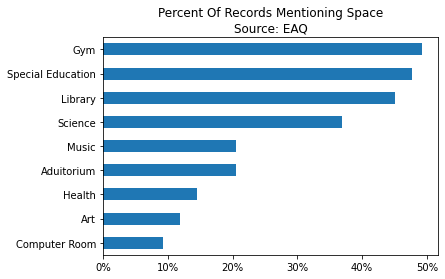

In [44]:
((EAQ.loc[:,'Art':].sum()/len(EAQ))*100).sort_values().plot(kind='barh',title='Percent Of Records Mentioning Space\nSource: EAQ').xaxis.set_major_formatter(mtick.PercentFormatter())

In [61]:
EAQ.iloc[:,95:]

,Security_identity,Security_wayfinding,Security_Section Notes,Security_AvgRating,LearningCommArea_Differentiated,LearningCommArea_PBL,Header_Schoolname,Header_code,Combo,Combo2,Art,Computer Room,Science,Library,Gym,Special Education,Aduitorium,Health,Music
0,4,4,Overall the building is in extremely good cond...,4.0,4,4,ABELARDO DIAZ MORALES,20578,add notes brand new light fixtures and act mov...,add notes @@ brand new light fixtures and act ...,0,0,0,1,0,1,1,1,0
1,2,2,6' concrete and chain link with barbed wire fe...,1.2,4,0,PEDRO MILLAN RIVERA,20669,covered outdoor bb court 70' x 100' and two bl...,covered outdoor bb court 70' x 100' and two bl...,0,0,1,1,0,1,0,1,0
2,4,4,Overall the school is just very small and does...,2.8,0,2,JOSE MERCADO,20719,school just does not have enough space for pro...,school just does not have enough space for pro...,0,1,1,0,0,1,1,1,0
3,0,0,"6' chain link with barbed wire, but some miss...",0.4,0,0,DIEGO VAZQUEZ,20735,play area is the paved courtyard area and cove...,play area is the paved courtyard area and cove...,0,0,0,1,0,1,0,0,0
4,0,0,Add notes,1.2,2,0,ANTONIO S PEDREIRA (PRE-TEC),20776,add notes add notes most of furniture is pille...,add notes @@ add notes @@ most of furniture is...,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,0,"Pre-k-6 now, next year add 7th grade",0.0,0,0,NUEVA ELEMENTAL URBANA DE GUAYNABO,78253,playground for small children but not used bec...,playground for small children but not used bec...,0,0,0,0,0,0,1,0,0
264,4,4,Add notes,3.6,2,2,FRANCISCO GAZTAMBIDE VEGA,78733,add notes add notes add notes add notes add no...,add notes @@ add notes @@ add notes @@ add not...,0,0,0,0,1,0,0,0,0
265,2,2,"Iron picket, wire mesh fence, building used as...",2.0,2,2,MARTIN GARCIA GIUSTI,78832,"3 pull-out room, open stage w/o roof at courty...","3 pull-out room, open stage w/o roof at courty...",1,0,1,1,1,1,1,1,0
266,2,0,Add notes,2.4,0,0,ADELA ROLON FUENTES,78931,add notes have a solar system add notes 36'x2...,add notes @@ have a solar system @@ add notes...,0,0,0,0,1,0,0,0,0


In [64]:
EAQ[['Unnamed: 0','Header_code','Header_Schoolname',
     'Combo','Combo2','Art','Computer Room','Science',
     'Library','Gym','Special Education','Aduitorium','Health','Music']].to_csv('EAQSpaceHits.csv')

In [247]:
EAQ.to_csv('EAQ With Space Tags.csv',index=False)